# STAT207 Mini-Project #1 - College Basketball Deep-Dive


## Laila Shaaban

In [1]:
#Imports here
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Introduction

In this analysis, I delve into the question of how the relationship between the chance of beating an average Division I team, `BARTHAG`, and number of wins, `W`, changes across different values of `CONF`, a team's conference affiliation. These variables are crucial as they shed light on the underlying dynamics of college basketball performance, helping us discern whether correlations between conference and wins are mere chance or indicative of deeper trends. College basketball's significance extends beyond the court, with revenue streams ranging from ticket sales to broadcasting rights, bolstered by alumni donations and program prestige. Understanding factors like conference affiliation, wins, and team strength illuminates the sport's cultural and economic importance, influencing everything from community pride to student-athlete opportunities. This analysis holds particular relevance for sports analysts and commentators, providing insights to predict team performance, analyze matchups, and offer informed commentary on college basketball tournaments and games.

## 2. Dataset Discussion

From Kaggle, I got the 'cbb.csv' dataset, which can be found here: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset. I downloaded this csv file on 2/13/24.

The dataset includes information from the Division I college basketball seasons from 2013 to 2023 (2020 was not included because of the COVID-19 epidemic, which prevented postseason play). This data was taken from http://barttorvik.com/trank.php#. Each row provides detailed information about a team's performance metrics, conference affiliation, postseason outcomes, and other relevant attributes. Data collection likely involved official NCAA records, sports analytics databases, and possibly direct data collection efforts. While the dataset offers comprehensive insights into team performance, it may lack certain nuanced aspects such as player-specific statistics or qualitative factors like coaching strategies. Despite these limitations, the dataset enables analysis of key variables such as `CONF` (conference affiliation), `W` (number of wins), and `BARTHAG` (chance of beating an average Division I team), facilitating a deeper understanding of the dynamics influencing college basketball success.


In [2]:
df = pd.read_csv('cbb.csv')
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [3]:
print('Number of Rows:', df.shape[0])    

Number of Rows: 3523


## 3. Dataset Cleaning

Since all of the types (in64, float64, object) correspond correctly to the variables' input types, there didn't seem to be any implicit missing values. Dropping all na values did show that there were explicit missing values, which led us to drop 2843 rows. Following this, I dropped the conferences that had less than 10 observations, which dropped 18 rows. Upon forming boxplots for my numerical variables chosen and calculating exactly where my outliers lay, I identified 2 high outliers for the `W` variable and opted to remove them from the dataset. Similarly, for the `BARTHAG` variable, I detected low outliers and also removed them. Removing outliers can make our data analysis more accurate, but we need to be careful because we might lose important information. It's important to think about both the good and bad sides of removing outliers to make sure our decisions are fair and don't mess up our results; it was essential to remove outliers here in order to make sure that irrational data doesn't yield false results of how the relationship between wins and chance of beating a D1 team varies based on conference (dropped 72 rows). Using red and green colors, I made my pre- and post-outlier cleaning boxplots distinct. After I created a scatterplot of the relationship between `BARTHAG` `and W`, I detected no outliers and left the plot as-is.

In [4]:
dfdrop = df.dropna()
print('Number of Rows Dropped After Removing Explicit Missing Values:', len(df)-len(dfdrop))
dfdrop

Number of Rows Dropped After Removing Explicit Missing Values: 2843


,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,Northern Kentucky,Horz,33,22,102.6,101.4,0.5349,49.1,51.3,17.3,...,30.5,47.4,49.3,34.3,36.4,61.9,-6.7,R64,16.0,2023
3224,Howard,MEAC,32,22,102.7,106.3,0.4031,51.8,50.9,22.8,...,33.9,49.8,51.1,36.9,33.8,69.0,-7.3,R64,16.0,2023
3225,Texas A&M Corpus Chris,Slnd,31,24,105.8,107.4,0.4566,50.5,52.6,17.7,...,38.2,48.3,54.1,36.4,33.8,68.9,-6.0,R64,16.0,2023
3226,Texas Southern,SWAC,33,14,95.4,105.4,0.2394,46.1,49.6,20.3,...,38.8,47.7,48.9,28.0,33.9,69.2,-13.5,R68,16.0,2023


In [5]:
dfdrop.dtypes

TEAM           object
CONF           object
G               int64
W               int64
ADJOE         float64
ADJDE         float64
BARTHAG       float64
EFG_O         float64
EFG_D         float64
TOR           float64
TORD          float64
ORB           float64
DRB           float64
FTR           float64
FTRD          float64
2P_O          float64
2P_D          float64
3P_O          float64
3P_D          float64
ADJ_T         float64
WAB           float64
POSTSEASON     object
SEED          float64
YEAR            int64
dtype: object

In [6]:
# Checking that every distinct value of 'CONF' has at least 10 observations in the dataset that correspond to it
value_counts = dfdrop['CONF'].value_counts()
values_to_drop = value_counts[value_counts < 10].index
dfdropcounts = dfdrop[~dfdrop['CONF'].isin(values_to_drop)]
print('Number of Dropped Rows that Had <10 Observations:', len(dfdrop)-len(dfdropcounts))

Number of Dropped Rows that Had <10 Observations: 18


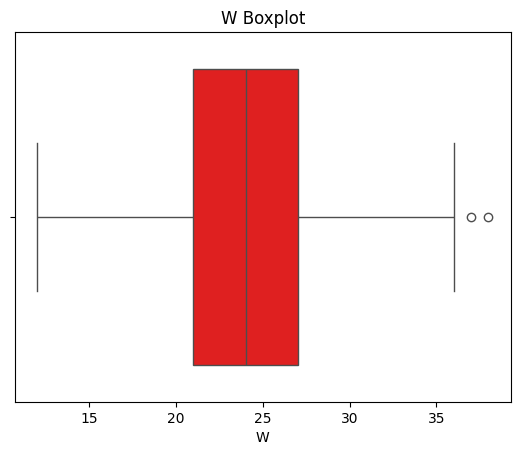

In [7]:
sns.boxplot(x = 'W', data = dfdropcounts, color = 'red')
plt.title('W Boxplot')
plt.show()

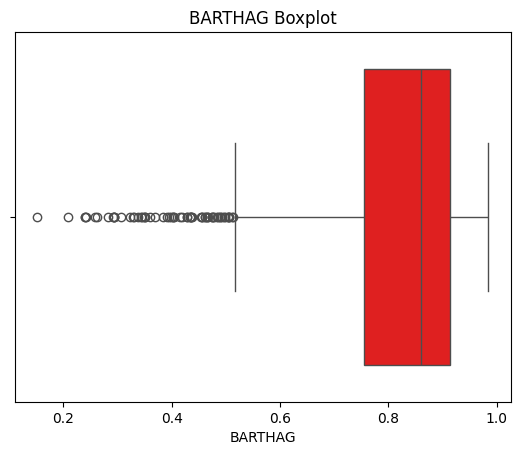

In [8]:
sns.boxplot(x = 'BARTHAG', data = dfdropcounts, color = 'red')
plt.title('BARTHAG Boxplot')
plt.show()

In [9]:
# Outlier Calculations for W
q1W, q3W = np.percentile(dfdropcounts['W'],[25,75])
IQR = q3W-q1W
upper = q3W + 1.5*IQR
lower = q1W - 1.5*IQR
print(lower,upper)

12.0 36.0


In [10]:
# Outlier Calculations for BARTHAG
q1B, q3B = np.percentile(dfdropcounts['BARTHAG'],[25,75])
IQR = q3B-q1B
upper = q3B + 1.5*IQR
lower = q1B - 1.5*IQR
print(lower,upper)

0.515925 1.1513250000000002


In [11]:
# Dropping outliers
dfcleaned = dfdropcounts[(dfdropcounts.W < 36) & (dfdropcounts.W > 12) & (dfdropcounts.BARTHAG > 0.515925) & (dfdropcounts.BARTHAG < 1.151325)]
print('Number of Rows Dropped:', len(dfdropcounts)-len(dfcleaned))

Number of Rows Dropped: 72


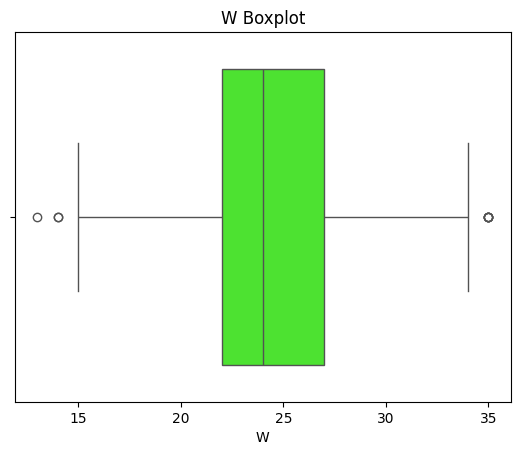

In [12]:
sns.boxplot(x = 'W', data = dfcleaned, color = '#39FF14')
plt.title('W Boxplot')
plt.show()

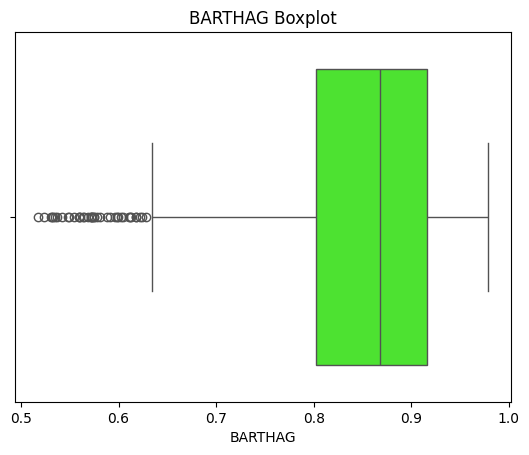

In [13]:
sns.boxplot(x = 'BARTHAG', data = dfcleaned, color = '#39FF14')
plt.title('BARTHAG Boxplot')
plt.show()

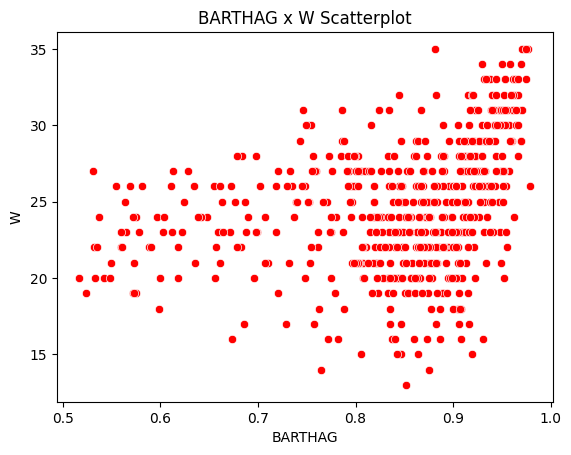

In [14]:
sns.scatterplot(x = 'BARTHAG', y = 'W', data = dfcleaned, color = 'red')
plt.title('BARTHAG x W Scatterplot')
plt.show()

## 4. <u>Research Question</u>: How does the Relationship between `BARTHAG` and `W` Change based on Different Values of `CONF` in the Dataset?

To thoroughly answer the research question, there are five things to focus on. First, the relationship between `BARTHAG` and `W` are not both positive for all conferences. For conferences, such as BSky and Pat, there are negative relationships between the `BARTHAG` and `W` variables when controlling for `CONF`. The relationship between the variables for all conferences seem to be linear. For big/well-known conferences such as the SEC and the Big 10, the relationships are stronger for the variables being analyzed. There are some outliers majority of conferences. The slope of the relationship between `BARTHAG` and `W` for the larger conferences is slightly steeper than it is for smaller/less well-known conferences. Overall, a conclusion can be made that the stronger and possibly more accurate trends are seen within the bigger conferences. This makes perfect sense since there is more data from these conferences, as they have the most teams and coverage, which can lead to more accurate relationships.

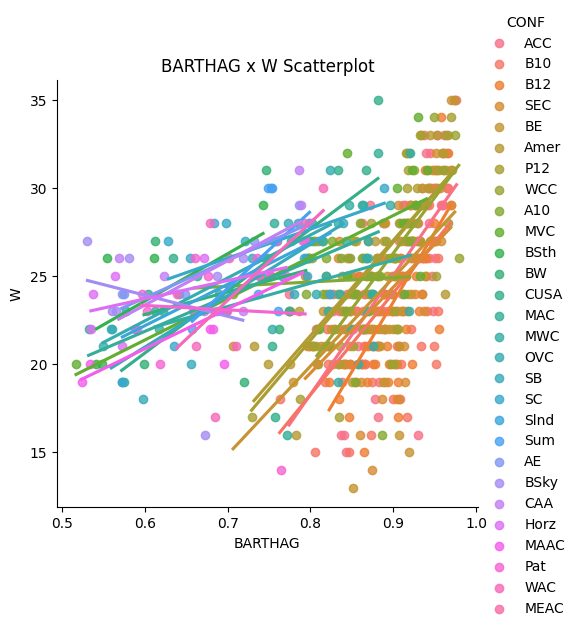

In [15]:
sns.lmplot(x = 'BARTHAG', y = 'W', hue = 'CONF', data = dfcleaned, ci = False)
plt.title('BARTHAG x W Scatterplot')
plt.show()

In [16]:
dfcleaned[['W','BARTHAG','CONF']].groupby(['CONF']).corr()

W   BARTHAG
CONF                            
A10  W        1.000000  0.053677
     BARTHAG  0.053677  1.000000
ACC  W        1.000000  0.669687
     BARTHAG  0.669687  1.000000
AE   W        1.000000  0.828845
     BARTHAG  0.828845  1.000000
Amer W        1.000000  0.794210
     BARTHAG  0.794210  1.000000
B10  W        1.000000  0.646920
     BARTHAG  0.646920  1.000000
B12  W        1.000000  0.694160
     BARTHAG  0.694160  1.000000
BE   W        1.000000  0.605467
     BARTHAG  0.605467  1.000000
BSky W        1.000000 -0.238792
     BARTHAG -0.238792  1.000000
BSth W        1.000000  0.633040
     BARTHAG  0.633040  1.000000
BW   W        1.000000  0.224940
     BARTHAG  0.224940  1.000000
CAA  W        1.000000  0.645962
     BARTHAG  0.645962  1.000000
CUSA W        1.000000  0.674380
     BARTHAG  0.674380  1.000000
Horz W        1.000000  0.577639
     BARTHAG  0.577639  1.000000
MAAC W        1.000000  0.824242
     BARTHAG  0.824242  1.000000
MAC  W        1.000000  0.520437
     BARTHAG  0.520437  1.000000
MEAC W             NaN       NaN
     BARTHAG       NaN       NaN
MVC  W        1.000000  0.657817
     BARTHAG  0.657817  1.000000
MWC  W        1.000000  0.285316
     BARTHAG  0.285316  1.000000
OVC  W        1.000000  0.826613
     BARTHAG  0.826613  1.000000
P12  W        1.000000  0.739145
     BARTHAG  0.739145  1.000000
Pat  W        1.000000 -0.044254
     BARTHAG -0.044254  1.000000
SB   W        1.000000  0.792831
     BARTHAG  0.792831  1.000000
SC   W        1.000000  0.566388
     BARTHAG  0.566388  1.000000
SEC  W        1.000000  0.527295
     BARTHAG  0.527295  1.000000
Slnd W        1.000000  0.541000
     BARTHAG  0.541000  1.000000
Sum  W        1.000000  0.567729
     BARTHAG  0.567729  1.000000
WAC  W        1.000000  0.631554
     BARTHAG  0.631554  1.000000
WCC  W        1.000000  0.692042
     BARTHAG  0.692042  1.000000

After analyzing the five aspects of the relationship between `BARTHAG` and `W` and `CONF` and seeing that the correlation between our two numerical variables vary greatly for different conferences, we can note that the relationship between chance of beating a Division I team and number of wins is dependent on conference. The conference that has the highest relationship between our two variables is the America East (AE) conference.

## 5. Conclusion

In this analysis, there may be a few shortcomings. With such a large dataset, it was hard to look for specifics, such as implicit missing values, conference-specific statistics and scatterplot details. For the scatterplot, it was hard to see which slopes were steeper and which were less since they were so clustered; when analyzing the correlation, it became clear which slopes were steeper, yet it didn't make me change my preliminary analysis of the scatterplot with all three variables involved since it was an analysis of what I saw, not what the numbers specifically were. In terms of the implicit missing values, I did multiple checks to see that I cleared them, yet it is hard to be completely sure without checking every row of data. For the conference-specific statistics, it was hard to see which conferences were influenced by which factors and how that could affect the three variables I was focused on. These shortcomings may add bias to my results, while also potentially yielding conclusions that can be subjective. For example, if I had not included my correlation table, I would have considered the wrong conference to have the strongest relationship between wins and chance of beating a DI team. Based on my analysis, one idea for future work could be to investigate the underlying facotrs driving these variations.